In [ ]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import zipfile
import random

In [ ]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
zip_file_name = '/content/drive/MyDrive/EarthQuakeData/data.zip'
output_dir = '/content/sample_data'  # Directory to store unzipped files

# Create a directory to store the unzipped files
os.makedirs(output_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cat_directory = '/content/sample_data/data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

row = cat.iloc[6]
arrival_time_rel = row['time_rel(sec)']

In [ ]:
for i in range(len(cat)):
  row = cat.iloc[i]
  arrival_time_rel = row['time_rel(sec)']
  print(arrival_time_rel)


In [ ]:
filenames=[]
arrivalTimes=[]
for i in range(len(cat)):
  row = cat.iloc[i]
  filename = row['filename']
  arrival_time_rel = row['time_rel(sec)']
  filenames.append(filename)
  arrivalTimes.append(arrival_time_rel)

In [ ]:
Snippits=[]
validate=[]
cat_directory = '/content/sample_data/data/lunar/training/data/S12_GradeA/'
minv=999999999
maxv=-999999999

def closest_value(arr, target):
    return min(arr, key=lambda x: abs(x - target))


for i in range(20):

  cat_file = cat_directory + filenames[i]+".csv"

  cat = pd.read_csv(cat_file)
  arrivalTime=arrivalTimes[i]
  vel=list(cat['velocity(m/s)'].tolist())
  times = list(cat['time_rel(sec)'].tolist())
  index=times.index(closest_value(times,arrivalTime))
  done=False
  for j in range(len(vel)):
    if times[j]>=arrivalTime and times[j]<=arrivalTime+4000:
      Snippits.append(vel[j])
      validate.append(1)
      done=True
    elif done:
      break
    else:
      if random.random()<0.1:
        Snippits.append(vel[j])
        validate.append(0)





print(len(Snippits))
print(len(validate))
print(minv)
print(maxv)

1170360
1170360
999999999
-999999999


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1000, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=8)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

In [ ]:


# Initialize the model
model = LogisticRegression()


In [ ]:
print(times[0],times[1])

0.0 0.1509433962264151


In [ ]:
amount=0
for i in range(len(validate)):
  if validate[i]==1:
    amount+=1
print(amount)
for i in range(len(Snippits)):
  if validate[i]==0:
    Snippits.pop(i)
    validate.pop(i)
  if len(validate)<=3*amount:
    break

1325011


KeyboardInterrupt: 

In [ ]:
Snippits=np.array(Snippits)
validate=np.array(validate)
Snippits=Snippits.reshape(-1, 1)

In [ ]:
model.fit(Snippits, validate)

LogisticRegression()

In [ ]:
y_test=validate
y_pred=model.predict(Snippits)
print(set(validate))
accuracy = accuracy_score(validate, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{0, 1}
Accuracy: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[640349      0]
 [530011      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71    640349
           1       0.00      0.00      0.00    530011

    accuracy                           0.55   1170360
   macro avg       0.27      0.50      0.35   1170360
weighted avg       0.30      0.55      0.39   1170360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

print(Snippits[0])
print(validate[0])
for i in range(len(Snippits)):
  if validate[i]==1:

    print(Snippits[i])
    print(validate[i])
    break



[-6.15327896e-14]
0
[9.00494208e-10]
1


NameError: name 'y_pred' is not defined

(572423,)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


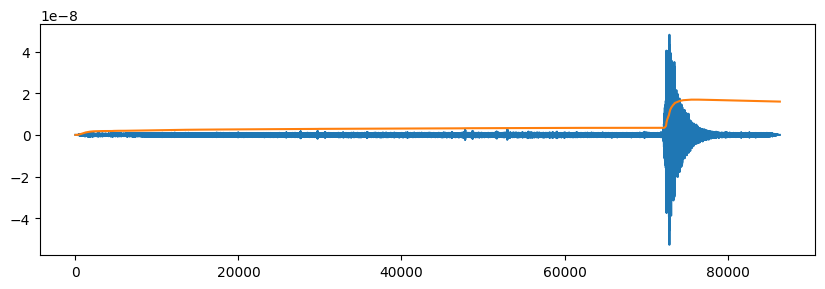

In [ ]:
from re import X
data_cat=pd.read_csv('/content/sample_data/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-06-26HR00_evid00009.csv')
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())
fig,ax = plt.subplots(1,1,figsize=(10,3))

std=0
vals=[]
other=[]
x=[]
y=[]
arrivalTime=72060.0
print(np.shape(csv_times))
std=0
for i in range(0,len(csv_times),100):
  std=np.std(csv_data[:i])
  x.append(csv_times[i])
  y.append(10*std)



ax.plot(csv_times,csv_data)
ax.plot(x,y)



In [ ]:
def rescale_array_to_range(arr, new_min, new_max):
    arr = np.array(arr)
    min_val = arr.min()
    max_val = arr.max()

    # Rescale to the new range
    scaled_arr = new_min + (arr - min_val) * (new_max - new_min) / (max_val - min_val)

    return scaled_arr


x=np.abs(x)


# Initialize the model
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

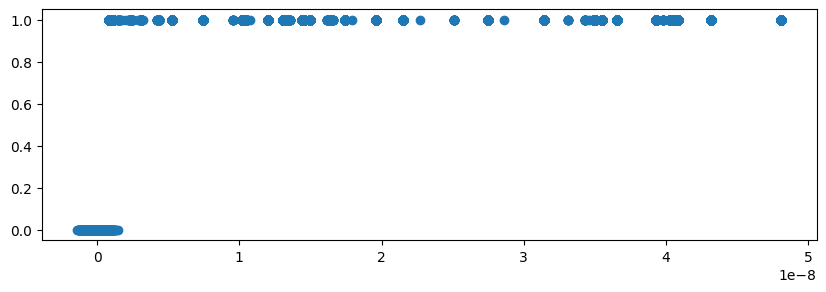

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.scatter(x,y)

In [ ]:
y_test=y
y_pred=model.predict(x)
print(set(validate))
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{0, 1}
Accuracy: 0.56
Confusion Matrix:
 [[    0 20773]
 [    0 26500]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20773
           1       0.56      1.00      0.72     26500

    accuracy                           0.56     47273
   macro avg       0.28      0.50      0.36     47273
weighted avg       0.31      0.56      0.40     47273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(model.predict(np.array([100000000000000]).reshape(-1, 1)))

[0]


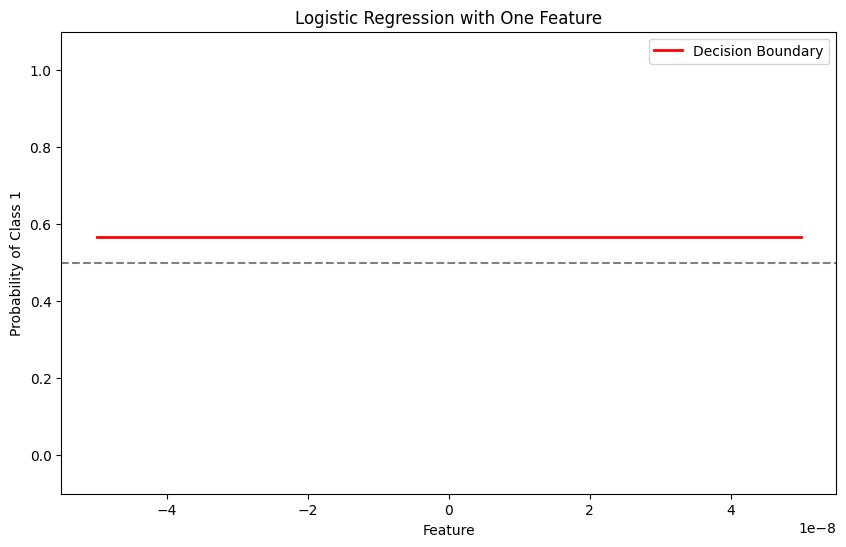

In [ ]:
# Create a mesh grid for plotting
X_train = Snippits
y_train = validate
X_test = Snippits
y_test = validate
# Create a range of values for plotting the decision boundary
x_range = np.linspace(-5e-8, 5e-8, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]  # Get probabilities for class 1

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(x_range, y_prob, color='red', label='Decision Boundary', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--')  # Threshold line
plt.xlabel('Feature')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression with One Feature')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

